# Support Vector Machines (SVM)

La máquina de soporte vectorial es otro algoritmo simple que todo experto en aprendizaje automático debería conocer. Muchos prefieren la máquina de soporte vectorial, ya que produce una precisión significativa con menos potencia de cálculo. Support Vector Machine, abreviado como SVM, se puede utilizar tanto para tareas de regresión como de clasificación. Pero, es ampliamente utilizado en la clasificación.

El objetivo del algoritmo SVM es encontrar el hiperplano óptimo en un espacio $n$-dimensional ($n$: el número de características o atributos) que separe los datos de dos clases distintas, maximizando la distancia entre las dos clases. El hiperplano es una superficie en un espacio de $n$ dimensiones que separa los datos de dos clases, donde $n$ es el número de características o atributos del conjunto de datos.

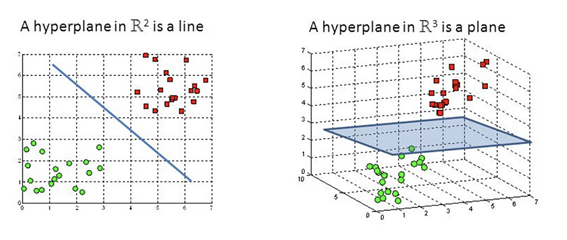

En resumen la SVM

- Es un algoritmo basado en **aprendizaje supervisado** 
- Es un algoritmo capaz de realizar **regresión y clasificación** (lineal y no lineal)
- Funciona muy bien para **conjuntos de datos complejos de tamaño pequeño** o mediano
- Puedes aplicarse de diferentes formas en función del conjunto de datos:
    - Conjuntos de **datos linealmente separables:**
        - *Hard Margin Classification*
        - *Soft Margin Classification*
    - Conjuntos de **datos linealmente no separables:**
        - *Kernels*

## SVM: Lineal

Las dos clases del siguiente conjunto de datos, puede separase claramente con una línea recta (Son linealmente separables)

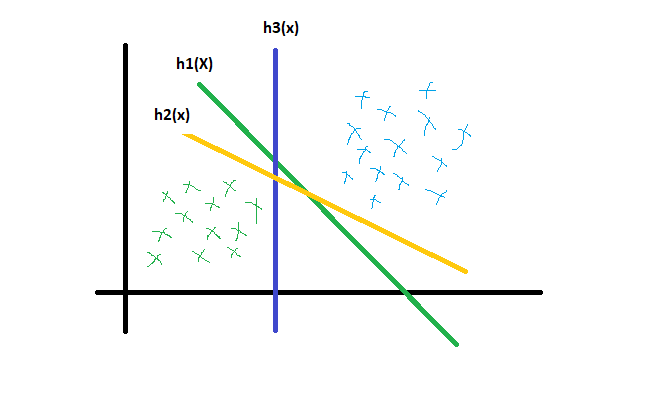

Los modelos representados funcionan bien para el conjunto de datos de entrenamiento, pero el limite de decisión se encuentra tan cerca de algunos ejemplos que es probable que cometan errores para nuevos ejemplos

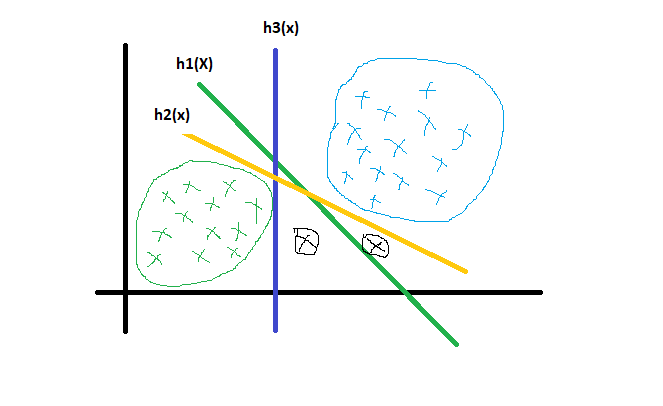

## SVM: Construcción de la función hipótesis

SVM es un algoritmo que no solo separa las dos clases, sino que intenta mantener el limite de decisión lo más alejado posible de los ejemplos de entrenamiento (**large margin classificaction**)

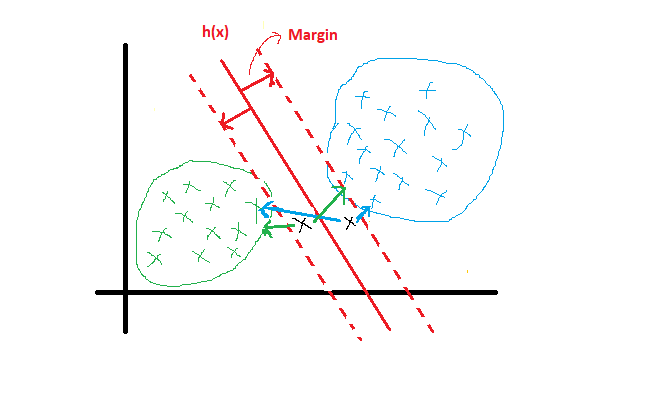

## SVM: Hard Margin Classification

Añadir más ejemplos de entrenamiento fuera de las lineas de puntos no alteran el modelo. Esta determinado por los ejemplos más cercanos al limite de decisión, conocidos como **support vectors**

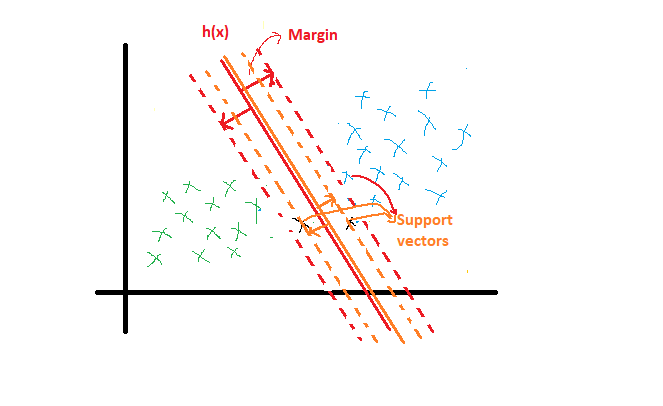

- El método que se acaba de presentar obliga de manera estricta a que todos los ejemplos de entrenamiento de cada una de las clases se encuentren detrás de la línea de puntos (support vectors)

- Este método tiene dos problemas fundamentales:
    - Sólo funciona con conjuntos de datos linealmente separables
    - Es muy sensible a datos anómalos

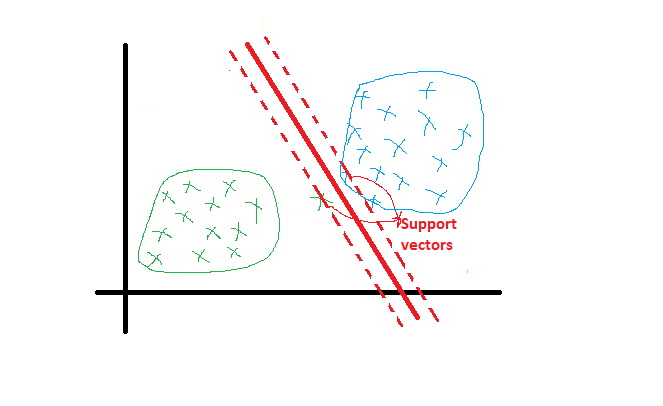

Si en nuestro conjunto de datos de entrenamiento hay un ejemplo anómalo, el limite de decisión se calcula erróneamente

### SVM: Función de costo

La función de costo de la regresión logística
$$ J(h_{\theta}(x),y)=-y\log(h_{\theta}(x))-(1-y)\log(1-h_{\theta}(x))$$
donde $h_{\theta}(x)=\frac{1}{1+e^{-(\theta^Tx+b)}}$ es la función sigmoide

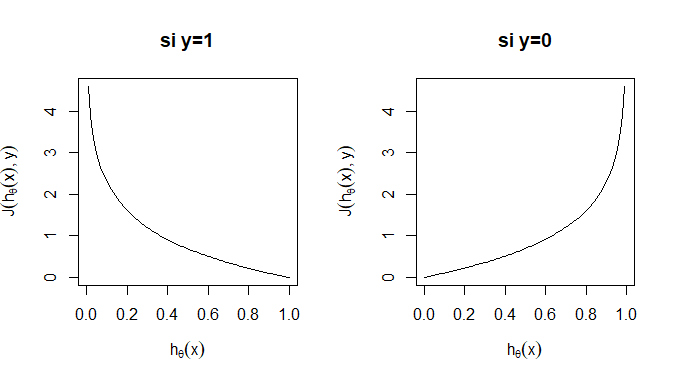

Luego la función de costo será:
$$ J(\theta^Tx+b)=-y\log\left(\frac{1}{1+e^{-(\theta^Tx+b)}}\right)-(1-y)\log\left(1-\frac{1}{1+e^{-(\theta^Tx+b)}}\right)$$

La función de costo SVM (**Hinge loss**):
$$
J(\theta^Tx+b)=
\left\{
  \begin{array}{ll}
    \max\{0,1-(\theta^Tx+b)\}, & \text{  si  }y=1 \\
    \max\{0,1+(\theta^Tx+b)\}, & \text{  si  }y=0
  \end{array}
\right.
$$

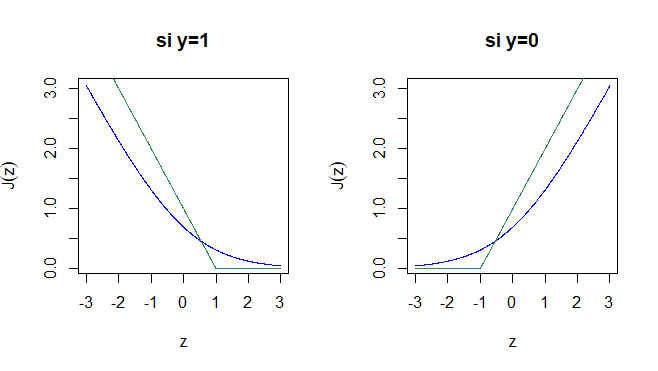

si $y=1$, $J(z)=0$ si $z=\theta^TX+b\geq 1$ 

si $y=0$, $J(z)=0$ si $z=\theta^TX+b\leq -1$


La función de costo SVM se expresa como:
$$
J(\theta^Tx+b)=y\max\{0,1-(\theta^TX+b)\}+(1-y)\max\{0,1+(\theta^TX+b)\}
$$
o equivalentemente
$$
J(\theta^Tx+b)=y\max\{0,1-y(\theta^TX+b)\},\ y\in\{+1,-1\}
$$

### SVM: Función hipótesis

**Regresión logística**: $h_{\theta}(x)=g(\theta_0+\theta_1x)$ predice valores continuos en el intervalo (0,1)

**SVM**:
$$
h_{\theta}(x)=sign\{\theta^Tx+b\}=
\left\{
  \begin{array}{ll}
    +1, &\text{si  }\theta^Tx+b\geq 1 \\
    -1, &\text{si  }\theta^Tx+b\leq -1
  \end{array}
\right.
$$
Que se puede expresar de forma compacta
$$
y(\theta^Tx+b)\geq 1,\ y\in\{+1,-1\}
$$

predice valores discretos $+1$ o $-1$



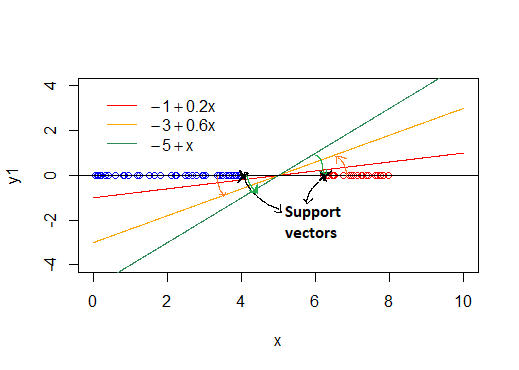

### SVM: Función de optimización Hard margin classification

Dados los vectores de entrenamiento $x_i\in\mathbb{R}^p,i=1,2,\ldots,n$ en dos clases, y un vector $y=\{-1,+1\}^n$, nuestro objetivo es encontrar $\theta\in\mathbb{R}^p$ y $b\in\mathbb{R}$ tal que la predicción dada por 
$y_i(\theta^Tx+b)$ es correcta para la mayoría de las muestras

Supongamos que el hiperplano que separa nuestras dos clases se define en forma vectorial como sigue
$$
\theta^Tx+b=0
$$

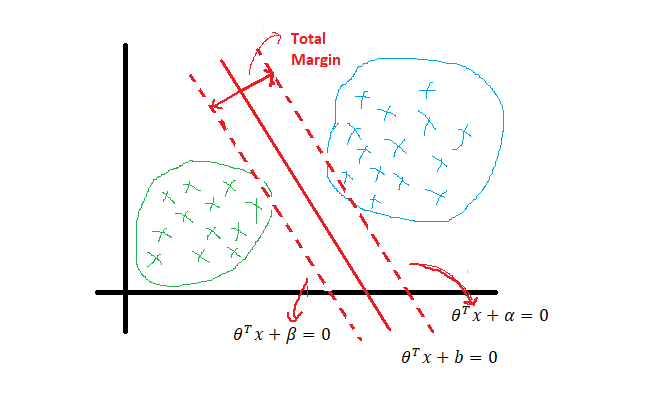

Entonces, podemos definir el margen por dos hiperplanos paralelos:
$$ \theta^Tx+\alpha=0\quad\text{ y }\quad \theta^Tx+\beta=0$$
Sin permitir clasificaciones erróneas en el **Hard margin classification**, queremos maximizar la distancia entre los dos hiperplanos. Para encontrar esta distancia, podemos usar la fórmula para la distancia de un punto desde un plano. Así que la distancia de las lineas punteadas a la linea central sería, respectivamente:
$$
\frac{|\theta^Tx+\alpha|}{\|\theta\|}\quad y \quad\frac{|\theta^Tx+\beta|}{\|\theta\|}
$$
Como resultado, el margen total se convertiría en:
$$
\frac{|\alpha-\beta|}{\|\theta\|}
$$
Queremos maximizar este margen. Sin la pérdida de generalidad, podemos considerar $\alpha = b+1$ y $\beta = b-1$. Posteriormente, el problema sería maximizar $\dfrac{2}{\|\theta\|}$ o minimizar$\dfrac{\|\theta\|} {2}$. Para facilitar el problema al tomar los degradados, en su lugar, hablaremos con su forma cuadrada:
$$ 
\min_{\theta, b} \hspace{2mm} \frac{1}{2} \|\theta\| ^2 \equiv 
\min_{\theta, b} \hspace{2mm} \frac{1}{2}\sum_{k=1}^n \theta_k^2 
$$
Esta optimización viene con algunas limitaciones. Supongamos que las etiquetas de nuestras clases son $\{-1, +1\}$. Al clasificar los puntos de datos, queremos que los puntos que pertenecen a las clases positivas sean mayores que $+1$, esto significa $\theta^Tx+b\geq 1$, y los puntos que pertenecen a las clases negativas sean menores que $-1$, es decir $\theta^Tx+b\leq -1$.

Podemos combinar estas dos restricciones y expresarlas como: $y_i(\theta^Tx_i+b)\geq 1$. Por lo tanto, nuestro problema de optimización se convertiría en:
$$
\min_{\theta, b}\hspace{2mm}\frac{1}{2}\sum_{k=1}^n\theta_k^2$$
Sujeta a:
$$
y_i(\theta^Tx_i+b)\geq 1
$$
Esta optimización se denomina problema primario y se garantiza que tendrá un mínimo global. Podemos resolver esto introduciendo multiplicadores de Lagrange ($\alpha_i$) y convirtiéndolo en el problema dual:
$$
L(\theta,b,\alpha)=\min_{\theta, b,\alpha} \hspace{2mm} \sum_{k=1}^n\theta_k^2-\sum_{i=1}^p\alpha_i(y_i(\theta^Tx_i+b)-1)
$$
Esto se llama la función lagrangiana del SVM que es diferenciable con respecto a $\theta$ y $b$.
\begin{eqnarray*}
  \nabla_{\theta}L(\theta,b,\alpha)=0 &\Rightarrow& \theta_k=\sum_{i=1}^{p}\alpha_{i}y_{i}x_{ik},\ k=1,\ldots,p \\
  \nabla_{b}L(\theta,b,\alpha)=0 &\Rightarrow& \sum_{i=1}^{p}\alpha_{i}y_{i}=0, \ \alpha_i\geq 0
\end{eqnarray*}

Al sustituirlos en el segundo término de la función lagrangiana, obtendremos el problema dual de SVM:
$$
\max_{\alpha}-\frac{1}{2}\sum_{i=1}^p\sum_{j=1}^p\alpha_i\alpha_jy_iy_jx_i^Tx_j+
\sum_{i=1}^p\alpha_i
$$
Sujeta a:
$$
\sum_{i=1}^p\alpha_iy_i=0, \ \alpha_i\geq 0
$$

El problema dual es más fácil de resolver ya que sólo tiene los multiplicadores de Lagrange. Además, el hecho de que el problema dual dependa de los productos internos de los datos de entrenamiento es útil cuando se extiende SVM lineal para aprender límites no lineales.

## SVM: Soft Margin Classification

Para evitar los problemas citados anteriormente, debe utilizarse un modelo más flexible: **Soft Margin Classification**

El objetivo de este modelo es mantener un balance adecuado entre mantener el limite de decisión lo más alejado posible de los ejemplos de entrenamiento y disminuir la sensibilidad a los ejemplos anómalos

En las implementaciones de SVM normalmente esto se controla mediante un hiperparámetro que suele estar representado mediante la letra $C$

$C=1$ es el valor predeterminado y es una opción predeterminada razonable. Si tiene muchas observaciones anómalas, debe disminuirlo: la disminución de $C$ corresponde a una mayor regularización.

Utilizando este método el algoritmo genera límites de decisión menos estrictos que generalizan mejor para nuevos ejemplos

El **Soft Margin Classification** sigue un procedimiento de optimización algo similar con un par de diferencias. Primero, permitimos que ocurran clasificaciones erróneas. Por lo tanto, tendremos que minimizar el error de clasificación errónea, lo que significa que tendremos que lidiar con una restricción más. En segundo lugar, para minimizar el error, debemos definir una función de costo. Una función de costo común utilizada para el soft margin es la hinge loss.
$$
\max\{0,1-y_i(\theta^Tx_i+b\}
$$
La pérdida de un punto mal clasificado se denomina variable de holgura y se añade al problema primario que teníamos para *hard margin classification*. Así que el problema primario para el soft margin se convierte en:
$$
\min_{\theta, b,\zeta}\hspace{2mm}\frac{1}{2}\sum_{k=1}^n\theta_k^2+C\sum_{i=1}^p\zeta_i$$
Sujeta a:
$$
y_i(\theta^Tx_i+b)\geq 1-\zeta_i,\quad \zeta_i\geq 0,\ i=1,\ldots,p
$$
El parámetro $C$ de regularización controla la compensación entre maximizar el margen y minimizar la pérdida. Como puede ver, la diferencia entre el problema primario y el del *hard margin* es la adición de variables de holgura. Las nuevas variables de holgura ($\zeta_i$ en la siguiente figura) añaden flexibilidad para las clasificaciones erróneas del modelo:

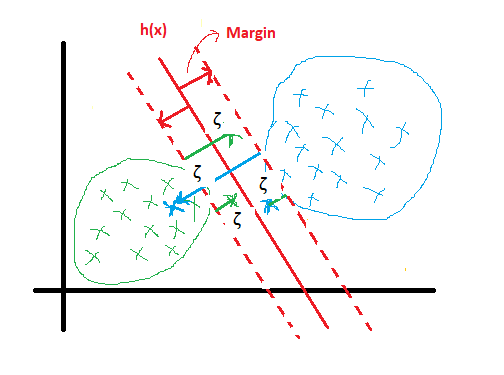

Finalmente, también podemos comparar los problemas duales:
$$\max_{\alpha}-\frac{1}{2}\sum_{i=1}^p\sum_{j=1}^p\alpha_i\alpha_jy_iy_jx_i^Tx_j+\sum_{i=1}^p\alpha_i
$$
Sujeta a:
$$
\sum_{i=1}^p\alpha_iy_i=0, \ 0\leq\alpha_i\leq C
$$

Como puede verse, en la forma dual, la diferencia es solo el límite superior aplicado a los multiplicadores de Lagrange.

## SVM: Kernels no lineal

Los clasificadores SVM lineales son eficientes y funcionan muy bien, sin embargo, existen **conjuntos de datos que no son linealmente separables**

La característica más interesante de SVM es que incluso puede trabajar con un conjunto de datos no lineal y para esto usamos "Kernel Trick" que facilita la clasificación de los puntos. Supongamos que tenemos un conjunto de datos como este:

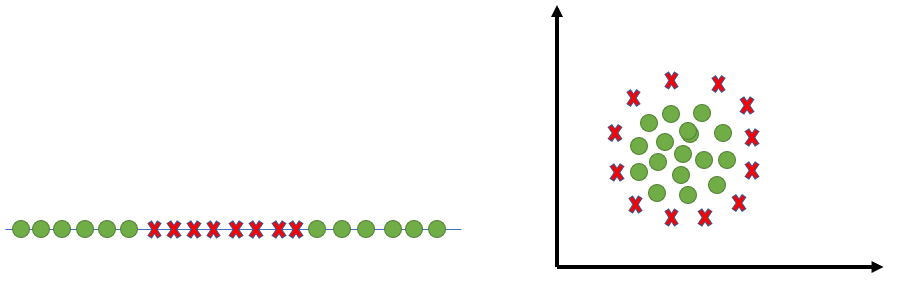

Aquí vemos que no podemos dibujar una sola línea o decir un hiperplano que pueda clasificar los puntos correctamente. Entonces, lo que hacemos es intentar convertir este espacio de menor dimensión en un espacio de mayor dimensión usando algunas funciones cuadráticas que nos permitirán encontrar un límite de decisión que divida claramente los puntos de datos. Estas funciones que nos ayudan a hacer esto se llaman Kernels y qué kernel usar está puramente determinado por el ajuste de hiperparámetros.

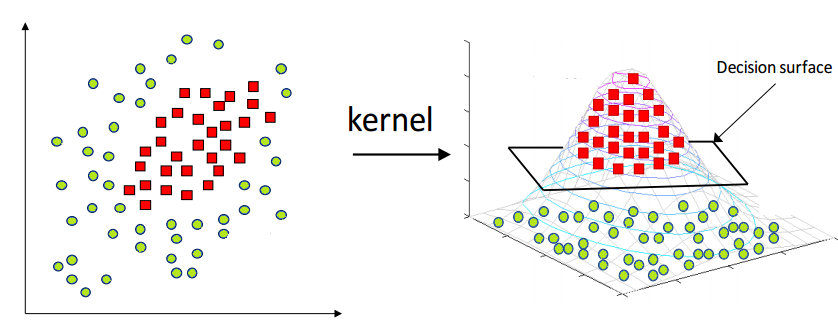

Algunas funciones del kernel que puede usar en SVM se detallan a continuación:

### Kernel polinomial

La siguiente es la fórmula para el **kernel polinomial (homogéneo)**:
$$
K(x,z)=(x\cdot z)^d,
$$
donde $d$ es el grado del polinomio, cuando $d=1$ este se denominal kernel lineal.

El **kernel polinómico (no homogéneo)**:
$$
K(x,z)=(x\cdot z+r)^d
$$
donde $r=\theta_0$

Utiliza características polinómicas para generar límites de decisión no lineales tiene un gran inconveniente

- Si se dispone de polinomios con un grado bajo, no pueden generarse limites de decisión complejos

- Si se dispone de polinomios con un grado alto, se generan un gran número de características, lo que requiere una capacidad de computo elevada y el modelo es lento

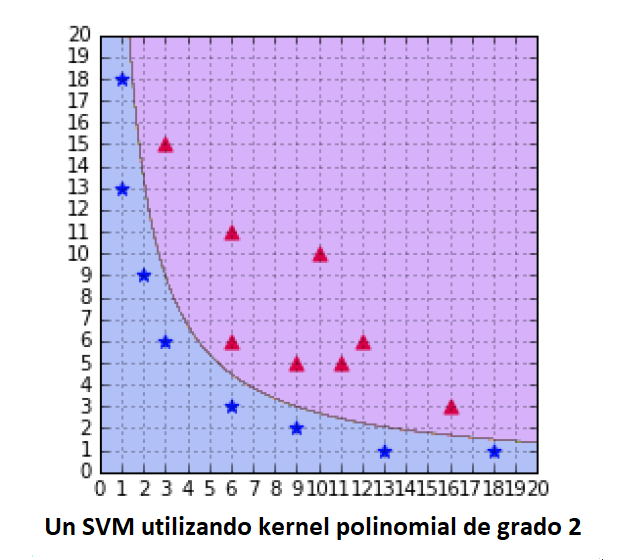

### Kernel RBF (función de base radial gaussiana )

Lo que realmente hace es crear combinaciones no lineales de nuestras funciones para llevar sus muestras a un espacio de funciones de mayor dimensión donde podemos usar un límite de decisión lineal para separar sus clases. 

Es el kernel más utilizado en las clasificaciones SVM, la siguiente fórmula lo explica matemáticamente:
$$
k(x,z)=\exp^{-\frac{1}{2\sigma^2} \|x-z\|^2},
$$
donde 

$\sigma^2$ es la varianza y nuestro hiperparámetro

$\|x-z\|^2$ es la distancia euclidea al cuadrado entre los puntos $x$ y $z$

Dado que el valor del kernel RBF disminuye con la distancia y oscila entre cero (en el límite) y uno (cuando $x=z$), esta se puede interpretación como medida de ***similitud***.

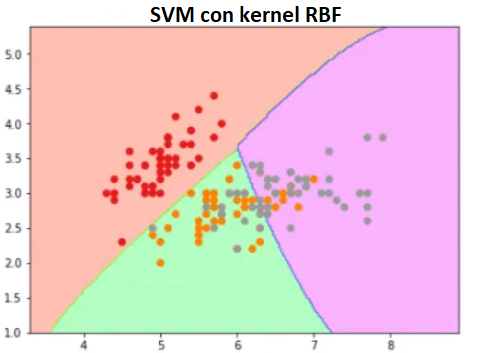

### Kernel Sigmoide (tangente hiperbólica)

La formula del kernel Sigmoide
$$
k(x,z)=\tanh(\kappa(x\cdot z+c),
$$
para algunos (no todos) $\kappa>0$ y $c< 0$

El kernel sigmoide se comporta como uno RBF, sin embargo, en general, su rendimiento nunca es dominante con respecto a RBF o los kernel polinómicos. Por lo que se sugiere probar los dos primeros métodos antes de este.

El kernel está relacionado con la transformación $\phi(x_i)$ por la ecuación $k(x_i,x_j)=\phi(x_i)\cdot \phi(x_j)$. El valor $\theta$ también está en el espacio transformado, con $\theta =\sum _i\alpha_iy_i\phi(x_i)$. Los productos punto con $\theta$ para la clasificación pueden ser calculados nuevamente por el kernel trick, es decir, $\theta \cdot \phi(x)=\sum_i\alpha_iy_iK(x_i,x_j)$.

De modo que podemos reescribir el problema de optimización de la siguiente manera.
$$
\min_{\theta, b,\zeta}\hspace{2mm}\frac{1}{2}\sum_{k=1}^n\theta_k^2+C\sum_{i=1}^p\zeta_i$$
Sujeta a:
$$
y_i(\theta^Tx_i+b)\geq 1-\zeta_i,\quad \zeta_i\geq 0,\ i=1,\ldots,p
$$

Al resolver el dual lagrangiano del problema anterior, se obtiene el problema simplificado.
$$\max_{\alpha}-\frac{1}{2}\sum_{i=1}^p\sum_{j=1}^p\alpha_i\alpha_jy_iy_j\phi(x_i)^T\phi(x_j)+\sum_{i=1}^p\alpha_i
$$
Sujeta a:
$$
\sum_{i=1}^p\alpha_iy_i=0, \ 0\leq\alpha_i\leq C
$$

Una vez que se resuelve el problema de optimización, la función de decisión para una muestra dada $x$ se convierte en:
$$
\sum_{i\in SV}\alpha_iy_iK(x_i,x)+b
$$
 
y la clase predicha corresponde a su signo. Solo necesitamos sumar sobre los vectores de soporte (es decir, las muestras que se encuentran dentro del margen) porque los coeficientes duales $\alpha_i$ son cero para las otras muestras.

## Ejemplo de Regresión

### Tolerancia al riesgo de los inversores

Para predecir la tolerancia al riesgo de un individuo, utilizaremos los datos de la Encuesta de Finanzas del Consumidor (SCF), realizada por la Junta de la Reserva Federal. La encuesta incluye respuestas sobre la demografía de los hogares, el patrimonio neto y los activos financieros y no financieros para el mismo conjunto de personas en 2007 (antes de la crisis) y 2009 (poscrisis). Esto nos permite ver cómo cambió la asignación de cada hogar después de la crisis financiera mundial de 2008. La fuente de los datos: <https://www.federalreserve.gov/econres/scf_2009p.htm>

Las librerías utilizadas en este ejemplo son:

## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import copy

from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
#Metricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Funciones auxiliares

In [2]:
# Construcción de un pipeline para los atributos numéricos
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

In [3]:
# Transormador para codificar únicamente las columnas categoricas y devolver un df
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._oh = OneHotEncoder(sparse=False)
        self._columns = None
    def fit(self, X, y=None):
        X_cat = X.select_dtypes(include=['object'])
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy.select_dtypes(include=['object'])
        X_num = X_copy.select_dtypes(exclude=['object'])
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh, 
                                columns=self._columns, 
                                index=X_copy.index)
        X_copy.drop(list(X_cat), axis=1, inplace=True)
        return X_copy.join(X_cat_oh)

In [4]:
# Transformador que prepara todo el conjunto de datos llamando pipelines y transformadores personalizados
class DataFramePreparer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._full_pipeline = None
        self._columns = None
    def fit(self, X, y=None):
        num_attribs = list(X.select_dtypes(exclude=['object']))
        cat_attribs = list(X.select_dtypes(include=['object']))
        self._full_pipeline = ColumnTransformer([
                ("num", num_pipeline, num_attribs),
                ("cat", CustomOneHotEncoder(), cat_attribs),
        ])
        self._full_pipeline.fit(X)
        self._columns = pd.get_dummies(X).columns
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_prep = self._full_pipeline.transform(X_copy)
        return pd.DataFrame(X_prep, 
                            columns=self._columns, 
                            index=X_copy.index)

# Cargar datos

In [5]:
dataset = pd.read_excel('SCFP2009panel.xlsx')

## Preparamos la variable de predicción

In [6]:
# Promedio SP500 durante el 2007 y 2009
Average_SP500_2007=1478
Average_SP500_2009=948

# Tolerancia al riesgo en 2007
dataset['RiskFree07']= dataset['LIQ07'] + dataset['CDS07'] + dataset['SAVBND07'] + dataset['CASHLI07']
dataset['Risky07'] = dataset['NMMF07'] + dataset['STOCKS07'] + dataset['BOND07'] 
dataset['RT07'] = dataset['Risky07']/(dataset['Risky07']+dataset['RiskFree07'])

# Tolerancia al riesgo en 2009
dataset['RiskFree09']= dataset['LIQ09'] + dataset['CDS09'] + dataset['SAVBND09'] + dataset['CASHLI09']
dataset['Risky09'] = dataset['NMMF09'] + dataset['STOCKS09'] + dataset['BOND09'] 
dataset['RT09'] = dataset['Risky09']/(dataset['Risky09']+dataset['RiskFree09'])*\
                (Average_SP500_2009/Average_SP500_2007)

Calculemos el cambio porcentual en la tolerancia al riesgo entre 2007 y 2009.

In [7]:
dataset2 = copy.deepcopy(dataset)
dataset2['PercentageChange'] = np.abs(dataset2['RT09']/dataset2['RT07']-1)

Comprobando las filas con valores nulos o nan y eliminándolas.

In [8]:
dataset2=dataset2.dropna(axis=0)
dataset2=dataset2[~dataset2.isin([np.nan, np.inf, -np.inf]).any(1)]

En el siguiente paso, elegimos a los inversores inteligentes cuyo cambio en la tolerancia al riesgo entre 2007 y 2009 fue inferior al 10%. El propósito sería predecir la verdadera tolerancia al riesgo de un individuo dadas las características demográficas, financieras y de disposición a asumir riesgos.

In [9]:
dataset3 = copy.deepcopy(dataset2)  
dataset3 = dataset3[dataset3['PercentageChange']<=.1]
dataset3['TrueRiskTolerance'] = (dataset3['RT07'] + dataset3['RT09'])/2

Eliminemos otras etiquetas que podrían no ser necesarias para la predicción.

In [10]:
dataset3.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)
dataset3.drop(labels=['PercentageChange'], axis=1, inplace=True)

## Selección de variables

### Eliminación de variables

Para filtrar aún más las variables, hacemos lo siguiente:

1. Consulte la descripción en el Diccionario de datos (https://www.federalreserve.gov/econres/files/codebk2009p.txt, https://www.federalreserve.gov/econresdata/scf/files/fedstables.macro.txt) y mantengamos sólo las variables que sean intuitivas

La descripción es la siguiente:


- **AGE:** Hay 6 categorías de edad, donde 1 representa menos de 35 años y 6 representa más de 75 años.
- **EDUC:** Hay 4 categorías educativas, donde 1 representa sin escuela secundaria y 4 representa título universitario.
- **MARRIED:** Representa el estado civil. Hay dos categorías donde 1 representa casado y 2 representa soltero.
- **OCCU:** Representa la categoría de ocupación. 1 representa categoría gerencial y 4 representa desempleado.
- **KIDS:** Representa el número de niños.
- **NWCAT:** Representa la categoría de patrimonio neto. Hay 5 categorías, donde 1 representa un patrimonio neto inferior al percentil 25 y 5 representa un patrimonio neto superior al percentil 90.
- **INCCL:** Representa la categoría de ingresos. Hay 5 categorías, donde 1 ingreso menor a 10,000 y 5 representa un patrimonio neto mayor a 100,000
- **RISK:** Representa la disposición a asumir riesgos en una escala de 1 a 4, donde 1 representa el nivel más alto de disposición a asumir riesgos.

2. Mantener sólo los factores intuitivos a partir de 2007 únicamente y eliminar todas las características intermedias y características relacionadas con 2009, ya que las variables de 2007 son las únicas necesarias para predecir la tolerancia al riesgo.

In [11]:
keep_list2 = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07',
              'NETWORTH07','TrueRiskTolerance']

drop_list2 = [col for col in dataset3.columns if col not in keep_list2]

dataset3.drop(labels=drop_list2, axis=1, inplace=True)

In [12]:
dataset3.head()

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,TrueRiskTolerance
60,77,2,1,0,3,3.141680e+04,4,2.152490e+05,0.199511
425,55,4,1,1,2,2.779588e+06,2,4.964759e+07,0.641458
1122,85,4,1,0,2,3.727417e+05,4,5.837768e+07,0.589943
1190,40,2,1,3,1,5.324882e+04,3,2.688929e+05,0.434127
1228,70,2,1,0,2,3.716767e+04,3,2.015066e+06,0.228218


## División de los datos

In [13]:
# dividir el conjunto de datos de validación para el final
Y= dataset3["TrueRiskTolerance"]
X = dataset3.loc[:, dataset3.columns != 'TrueRiskTolerance']
validation_size = 0.2
seed = 3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Modelo SVR

In [14]:
model_SVR = SVR()
model_SVR.fit(X_train, Y_train)

SVR()

## Predicción

In [15]:
Y_pred = model_SVR.predict(X_test)

In [16]:
# Error de test del modelo 
# ==============================================================================
rmse_svr = mean_squared_error(
            y_true  = Y_test,
            y_pred  = Y_pred,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_svr}")


El error (rmse) de test es: 0.16809039694613856


## Ejemplo de clasificación 

El conjunto de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales ni más información general sobre los datos. Las características V1, V2, … V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Cantidad' es la cantidad de la transacción, esta función se puede utilizar para el aprendizaje sensible a los costos dependiente del ejemplo. Feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.


In [17]:
dataset = pd.read_csv("creditcard.csv")

## División del conjunto de datos

In [18]:
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
validation_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=validation_size, 
                                                   stratify=dataset["Class"],
                                                   random_state=seed)

## Preparación del conjunto de datos¶

In [19]:
# Instanciamos nuestro transformador personalizado
data_preparer = DataFramePreparer()

In [20]:
# Hacemos el fit con el conjunto de datos general para que adquiera todos los valores posibles
data_preparer.fit(X)

DataFramePreparer()

## Escalado del conjunto de datos

In [21]:
# Transformamos el subconjunto de datos de entrenamiento
X_train_prep = data_preparer.transform(X_train)

In [22]:
# Transformamos el subconjunto de datos de validacion
X_test_prep = data_preparer.transform(X_test)

## Modelo SVC

In [23]:
model_SVC = SVC()
model_SVC.fit(X_train_prep, Y_train)

SVC()

## Accuracy

In [24]:
# Accuracy de test del modelo 

Y_pred = model_SVC.predict(X=X_test_prep)
print(accuracy_score(Y_test, Y_pred))

0.999420666409185
